# Introduction to Machine Learning




### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Set path & import dataset

In [2]:
#set path
path = r'C:\Users\beatr\Documents\27_06_2023-Boat_Marketing'

In [3]:
#import data set
df_boats = pd.read_pickle(os.path.join(path, '02-Data', 'Prepared', 'Boats_Explored.pkl'))

In [12]:
#check columns
df_boats.columns

Index(['boat_type', 'manufacturer', 'type', 'year_built', 'length', 'width',
       'material', 'views_last_7_days', 'currency', 'value', 'value_in_eur',
       'country', 'Price category', 'Popularity', 'Boat_age'],
      dtype='object')

In [4]:
#check shape of data
df_boats.shape

(9192, 15)

In [5]:
df_boats.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country,Price category,Popularity,Boat_age
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337.0,Switzerland,Low price,Very popular,Relatively old boat
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany,Low price,More popular,New boat
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367.0,Denmark,Low price,Not that popular,New boat
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany,Low price,Not that popular,New boat
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600.0,Switzerland,Low price,Very popular,Old boat


### 3. Data checks

In [9]:
#1. Check Data inconsistencies - mixed data types
for col in df_boats.columns.tolist():
  weird = (df_boats[[col]].applymap(type) != df_boats[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_boats[weird]) > 0:
    print (col)

In [8]:
#change to string
df_boats['Popularity'] = df_boats['Popularity'].astype('str')

In [10]:
#2. identify missing values
df_boats.isnull().sum()

boat_type            0
manufacturer         0
type                 0
year_built           0
length               0
width                0
material             0
views_last_7_days    0
currency             0
value                0
value_in_eur         0
country              0
Price category       0
Popularity           0
Boat_age             0
dtype: int64

In [11]:
# 3. duplicates
df_dups = df_boats[df_boats.duplicated()]
df_dups
#No duplicates

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country,Price category,Popularity,Boat_age


### 4. Extreme values check

#### 1. Look at the distribution in Data

<Axes: xlabel='value_in_eur', ylabel='Count'>

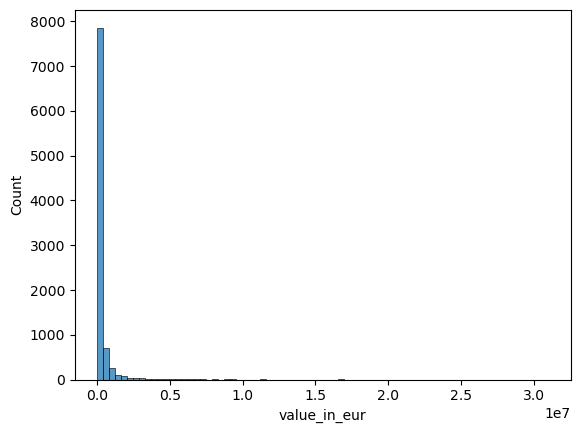

In [14]:
sns.histplot(df_boats['value_in_eur'], bins=75) # Shows extreme values

# To identify outliers

<Axes: xlabel='views_last_7_days', ylabel='Count'>

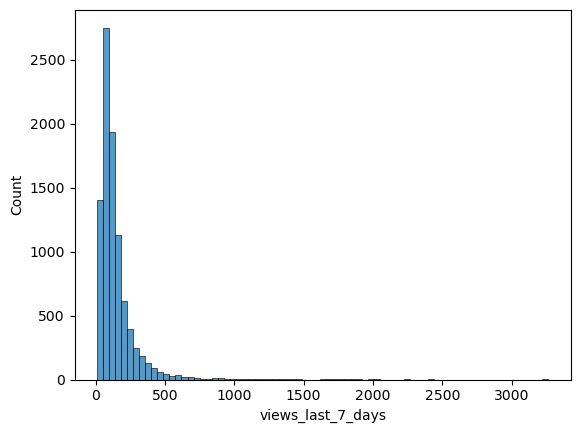

In [15]:
sns.histplot(df_boats['views_last_7_days'], bins=75) # Shows extreme values

# To identify outliers

#### 2. Look at the price of boats

In [16]:
# see the quantiles
df_boats['value_in_eur'].quantile([0.25, 0.50, 0.75])

0.25     44993.75
0.50     95829.50
0.75    249525.75
Name: value_in_eur, dtype: float64

In [18]:
#Look at the mean
df_boats['value_in_eur'].mean()

301799.16784377716

In [19]:
#Look at the median
df_boats['value_in_eur'].median()

95829.5

In [20]:
#Look at the max price
df_boats['value_in_eur'].max()

31000000.0

In [24]:
# see the quantiles
df_boats['views_last_7_days'].quantile([0.25, 0.50, 0.75])

0.25     70.0
0.50    107.0
0.75    170.0
Name: views_last_7_days, dtype: float64

#### 2 Look at number of views in the last week

In [21]:
#Look at the mean
df_boats['views_last_7_days'].mean()

147.74912967798085

In [22]:
#Look at the median
df_boats['views_last_7_days'].median()

107.0

In [23]:
#Look at the max price
df_boats['views_last_7_days'].max()

3263

### 5. Data preperation


In [26]:
df_boats.columns

Index(['boat_type', 'manufacturer', 'type', 'year_built', 'length', 'width',
       'material', 'views_last_7_days', 'currency', 'value', 'value_in_eur',
       'country', 'Price category', 'Popularity', 'Boat_age'],
      dtype='object')

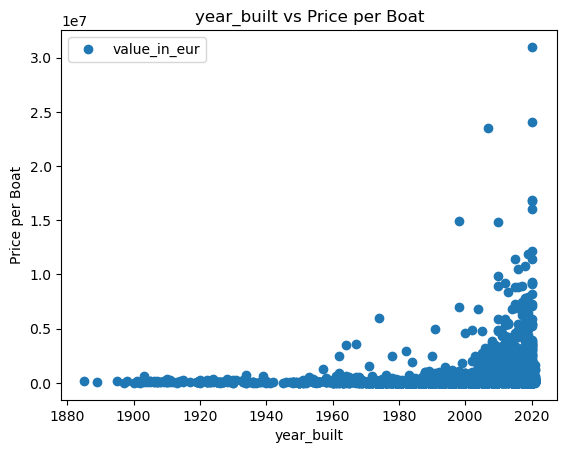

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_boats.plot(x = 'year_built', y='value_in_eur',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('year_built vs Price per Boat')  
plt.xlabel('year_built')  
plt.ylabel('Price per Boat')  
plt.show()

### 5. State your hypothesis
- The more modern the Boat the higher the price.

### 6. Reshape the variables into NumPy arrays

In [31]:
# 1. reshape to arrays to use sklearn library
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_boats['year_built'].values.reshape(-1,1)
y = df_boats['value_in_eur'].values.reshape(-1,1)

In [32]:
# check to see if array
X

array([[2017],
       [2020],
       [2020],
       ...,
       [2020],
       [2018],
       [2019]], dtype=int64)

### 7. Split the data into two sets: a training set and a test set.

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. linear regression

In [34]:
# Create a regression object.

regression = LinearRegression()

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# predict y with X test data
y_predicted = regression.predict(X_test)

### 9. Create a plot that shows the regression line on the test set

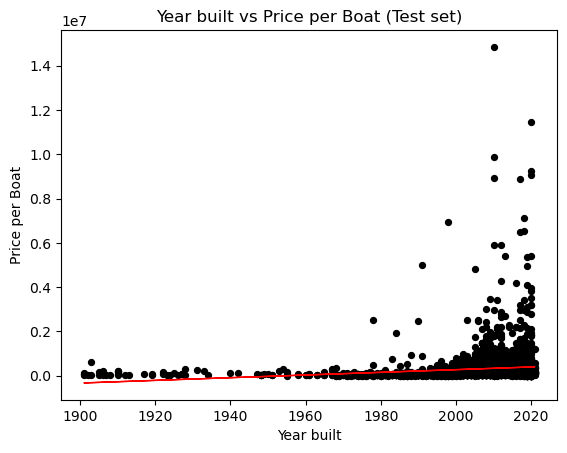

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 18)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 1)
plot_test.title('Year built vs Price per Boat (Test set)')
plot_test.xlabel('Year built')
plot_test.ylabel('Price per Boat')
plot_test.show()

### 10 Write your own interpretation of how well the line appears to fit the data

- The line does not fit the data well
- A different machine learning model should be used

### 11. Check the model performance statistics—MSE and R2 score.

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

#The Mean squared error backs our view that the model is not a good fit
#As does the R2 score as 1,48% which is very bad

Slope: [[6052.55650807]]
Mean squared error:  584970007281.157
R2 score:  0.014793968357961984


### 12. Compare the predicted y values with the actual y values in a dataframe.

In [43]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)
# huge variation
# old boats may expensive also
# we need to re-assess out hyppthesis

,Actual,Predicted
0,35000.0,312177.936241
1,14950.0,294020.266717
2,885000.0,378756.057830
3,4900.0,245599.814652
4,65000.0,366650.944814
5,949000.0,360598.388306
6,24500.0,203231.919096
7,39170.0,396913.727354
8,69000.0,239547.258144
9,119600.0,396913.727354


### 13. Include your thoughts on how well the model performed
- The model did not perform very well.
- It seems that boats built earlier or older boats may be expensive as well 
- More variables need to be included, the size of the boat, the engine type etc...
